# Projet d'optimisation

**Josué Agbekodo et Viviane Lesbre**

In [ ]:
from casadi import *
import tim
import matplotlib.pyplot as plt

## Question 1 :
Cette situation correspond à la gestion d'un protefeuille d'action en bourse. Il y a n actions à acheter et l'investisseur place à chaque fois $x_i$ sur la ième action.

L'équation (1) nous signale que  $ \sum_{i=1}^{n} x_i =1 $, donc notre budget total est de 1.
L'équation (2) indique qu'en se fixant au préalable un risque qu'on veut bien prendre, on est peut investir plus ou moins selon la fluctuation des prix. Plus celle-ci est grande, plus un même investissement impliquera un gros risque pour nous, donc moins on pourra investir.

## Question 2 :

On cherche à minimiser le risque soit l'expression $x^T \Sigma x$ sachant que $ 1^Tx=1$ et $\bar p^Tx=r$. Ainsi on introduit 
$$
\begin{cases}
\forall x \in \mathbb{R^n}, c_{eq}(x) = (1^T x -1,\bar p^Tx-r) \\
\forall x \in \mathbb{R^n}, f(x) = x^T \Sigma x \\
\end{cases}
$$

Et le problème revient bien à $ \underset{c_{eq}=0}{min} f(x) $

On a ici pris $z=x$, il y a donc $n_i = n$ variables de décisions: ce sont les $x_i$.

On a donc $\forall x \in \mathbb{R^n}, f(x)= x^T\Sigma x$

## Question 3:

Cette contrainte signifie que les $(-x_i)_{1 \leq i \leq n}$ ne doivent pas être trop élevés, donc que les composantes de x ne doivent pas trop s'étendre dans les négatifs, et donc qu'il ne faut pas trop faire d'investissements "négatifs", c'est-à-dire à qu'il ne faut pas trop vendre des actifs.

En posant $\forall x \in \mathbb{R^n}, c_M(x)=1^Tmax(-x,0)-s_M$, cette contrainte restreint donc notre ensemble d'étude à E= {$x \in \mathbb{R^n}, c_{eq}(x) = 0, c_M(x)\leq 0$}, nous avons donc deux contraintes d'égalité et une d'inégalité, ce qui pose un problème pour les algorithmes que nous connaissons, qui ne considrèent que des contraintes d'égalité ou alors que des contraintes d'inégalité.

## Question 4:
On voit que tous les $s \in \mathbb{R^n}$ qui vérifient $s \geq -x$ et $s \geq 0 $ vérifient alors $s \geq max(-x,0)$ en regardant composante par composante.

En notant F={$s \in \mathbb{R^n}, s \geq -x, s \geq 0$}, on peut dire que $max(-x,0)$ est le minimum de $F$. 

La dernière condition ($1^Ts \leq s_M$) est une inégalité qui empêche $s$ d'être trop élevée.
Donc si il existe un $s \in F$ qui respecte cette dernière condition, c'est que $max(-x,0)$ la respecte aussi (en tant que minimum de F). A l'inverse, si $max(-x,0)$ respecte cette condition, alors il existe $s \in F$ qui respecte cette condition (par exemple, $s=max(-x,0)$). 

On a donc bien équivalence entre les conditions (5) et le fait de trouver un $ s \in \mathbb{R^n}$ qui respecte les 3 conditions  $ s \geq -x , s \geq 0$ et $1^Ts \leq s_M$.

Le problème de la question 2 est maintenant:  $\underset{\exists s \in \mathbb{R^n}, s \,\geq -x ,\, s \,\geq\, 0,\, 1^Ts \leq s_M }{\underset{\bar p^Tx-r=0}{\underset{1^Tx-1=0}{minf(x)}}}$ 

### Question 5

C'est un problème d'optimisation sous contraintes d'égalités linéaires. 
On peut donc définir le Lagrangien $L: (x,\lambda)\in \mathbb{R^n}\times \mathbb{R} \rightarrow f(x) +\lambda^T(1^Tx-1)$ ou bien appliquer l'algorithme d'élimination des variables pour contraintes linéaires d'optimisation sans contrainte. On se ramène dans les deux cas à un problème d'optimisation sans contraintes, qu'on peut résoudre avec les algorithmes correspondant (comme par exemple l'algorithme BFGS). 

### Question 6

Déjà:

$x=\begin{pmatrix} x_1\\  x_2\\  x_3 \end{pmatrix}$

$x^t\Sigma x=(x_1, x_2, x_3) \begin{pmatrix} \sigma_1^2 &\rho\sigma_1\sigma_2 & 0\\\rho\sigma_1\sigma_2&\sigma_2^2&0\\0&0&\sigma_3^2 \end{pmatrix}
 \begin{pmatrix} x_1\\ x_2\\ x_3\\ \end{pmatrix} \newline\newline$
 $x^t\Sigma x= (\sigma_1x_1)^2+(\sigma_2x_2)^2+(\sigma_3x_3)^2+2\rho\sigma_1\sigma_2x_1x_2
 $

In [14]:
def minimize_f(p1,p2,p3,sigma1,sigma2,sigma3,rho,r):


    def f(x):     #fonction à minimiser
        return (sigma1*x[0])**2 + (sigma2*x[1])**2 + (sigma3*x[2])**2 + 2*rho*sigma1*sigma2*x[1]*x[0]

    def g1(x):
        return x[0]+x[1]+x[2] - 1    #première contrainte d'égalité

    def g2(x):
        return p1*x[0] + p2*x[1] + p3*x[2] - r    #deuxième contrainte d'égalité


    opti = casadi.Opti()
    x = opti.variable(3)

    f=f(x)
    opti.minimize(f)
    opti.subject_to(g1(x) == 0)
    opti.subject_to(g2(x) == 0)
    x0 = np.array([0.,0.,0.])
    opti.set_initial(x,x0)
    opti.solver('ipopt')
    sol = opti.solve()
    print(sol.value(x))


In [15]:
minimize_f(0.05,0.15,0.3,0.1,0.3,0.8,0.1,0.1)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 0

On obtient $x=[0.633,\, 0.279,\, 0.088]$ 

### Question 7

In [11]:
minimize_f(0.05,0.15,0.3,0.1,0.3,0.8,0.5,0.1)
minimize_f(0.05,0.15,0.3,0.1,0.3,0.8,-0.5,0.1)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 0

Pour $\rho=-0.5:   x=[0.609,\, 0.318,\, 0.073]$

Pour $\rho= 0.5: \,\,\,x=[0.652,\, 0.247,\, 0.101]$

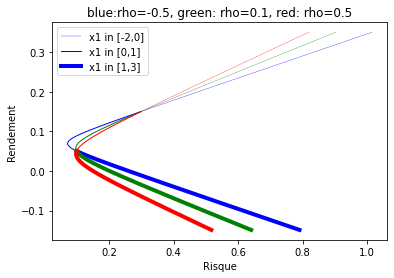

In [64]:
def f(x, rho, p1 = 0.05, p2 = 0.15, p3 = 0.3, sigma1 = 0.1, sigma2 = 0.3, sigma3 = 0.8, r = 0.1, ):
    return (sigma1*x[0])**2 + (sigma2*x[1])**2 + (sigma3*x[2])**2 + 2*rho*sigma1*sigma2*x[1]*x[0]
def h(x):
    return 0.05*x[0]+0.15*x[1]+0.3*x[2]

rhos=[-0.5,0.1,0.5]
colors=["b","g","r"]
###pour x1,x2 dans [0,1]^2

x1=np.arange(0,1,0.01) #maillage fin
x=[[x1[i],1-x1[i],0] for i in range(len(x1))] #on a bien x1+x2+x3=1
y1=np.arange(-2,0,0.01)
y=[[y1[i],1-y1[i],0] for i in range(len(y1))]
z1=np.arange(1,3,0.01)
z=[[z1[i],1-z1[i],0] for i in range(len(z1))]

for i in range(3):
    rho=rhos[i]
    color=colors[i]
    abs_x=[f(x[j],rho) for j in range(len(x))]
    ord_x=[h(x[j]) for j in range(len(x))]
    abs_y=[f(y[j],rho) for j in range(len(y))]
    ord_y=[h(y[j]) for j in range(len(y))]
    abs_z=[f(z[j],rho) for j in range(len(z))]
    ord_z=[h(z[j]) for j in range(len(z))]
    plt.plot(np.sqrt(abs_y), ord_y, color,linewidth=0.3, label=f'x1 in [-2,0]')
    plt.plot(np.sqrt(abs_x), ord_x,color, linewidth=1 ,label='x1 in [0,1]')
    plt.plot(np.sqrt(abs_z), ord_z,color, linewidth=4,label=f'x1 in [1,3]')  
    if i==0:
        plt.legend()
plt.title("blue:rho=-0.5, green: rho=0.1, red: rho=0.5")    
plt.xlabel("Risque")
plt.ylabel("Rendement")
plt.show()
    
    




On voit donc que le quand $x_1 $ou $x_2$ est dans [-2,0], la valeur absolue du rendement augmente avec $\rho$, mais que quand 
$x_1$ et $x_2$ sont dans [0,1], le rendement diminue si $\rho$ augmente.

Donc plus $\rho$ est élevé, plus investir des grosses sommes sur un seul actif peut faire gagner ou perdre beaucoup d'argent. A l'inverse, un $\rho$ faible augmente le rendement pour les "petits" investissements et donne des valeurs moins extrêmes du rendement pour les "gros" investissements.

$\rho$ est donc un facteur qui accentue le risque dans les gros investissements.

C'est cohérent avec le fait qu'on ait vu que l'investissement maximal soit plus important pour $\rho = 0.5$ que pour $\rho = -0.5$

### Question 8

In [66]:
minimize_f(0.05,0.15,0.3,0.1,0.3,0.8,0.1,0.2)
minimize_f(0.05,0.15,0.3,0.1,0.3,0.8,0.1,0.15)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 0

Pour $r=0.1: x=[0.633,\, 0.279,\, 0.088]$

Pour $r=0.2 :x=[-0.083,\,  0.805,\,   0.278]$

Pour $r=0.15: x=[0.275,\, 0.542,\, 0.183]$

On voit alors que la solution pour $r=0.15$ est la moyenne des solutions pour r=0.1 et r=0.2

0.15 est justement la moyenne de 0.1 et 0.2

On en déduit que connaitre les solution pour $r_1$ et $r_2$ suffit pour la déterminer à n'importe quel $r$:

Si $r= (1-\lambda)r_1 +\lambda r_2$, alors $x_r =(1-\lambda)x_{r_1} +\lambda x_{r_2}$ (avec $\lambda \in \mathbb{R}$

Enfin, si $\sigma_3 = 0$, alors la fonction $f$ ne dépend plus de $x_3$, donc on enlève un degré de liberté et investir dans un fond optimal suffirait à les déterminer tous.

### Question 9


In [87]:
sm=0.5
a=np.array([1.,0.,-4.])
b=np.maximum(-a,0)
b[0]+b[1]+b[2]-0.5
def g3(x):
        y=np.maximum(-x,np.zeros(3))
        return y[0]+y[1]+y[2]-sm
g3(a)

3.5

In [88]:
def minimize_f_short(p1,p2,p3,sigma1,sigma2,sigma3,rho,r,sm):

    def f(x):
        return (sigma1*x[0])**2 + (sigma2*x[1])**2 + (sigma3*x[2])**2 + 2*rho*s1*s2*x[1]*x[0]

    def g1(x):
        return x[0]+x[1]+x[2] - 1

    def g2(x):
        return p1*x[0] + p2*x[1] + p3*x[2] - r

    #ajout de la nouvelle contrainte
    def g3(x):
        return x[3]+x[4]+x[5] - sm

    opti = casadi.Opti()
    x = opti.variable(6)
    f = f(x)
    opti.minimize(f)
    opti.subject_to(g2(x) == 0)
    opti.subject_to(g1(x) == 0)
    opti.subject_to(g3(x)<=0)
    opti.subject_to(x[3] + x[0] >= 0)
    opti.subject_to(x[4] + x[1] >= 0)
    opti.subject_to(x[5] + x[2] >= 0)
    opti.subject_to(x[3] >= 0)
    opti.subject_to(x[4] >= 0)
    opti.subject_to(x[5] >= 0)

    x0 = np.array([0.,0.,0.,0.,0.,0.])
    opti.set_initial(x,x0)
    opti.solver('ipopt')
    sol = opti.solve()
    print(sol.value(x))

In [91]:
minimize_f_short(0.05,0.15,0.3,0.1,0.3,0.8,0.1,0.4,0.5)
minimize_f(0.05,0.15,0.3,0.1,0.3,0.8,0.1,0.4)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:       12
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        7
        inequality constraints with only lower bounds:        6
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 0

Donc avec la contrainte des positions courtes:
    $x = [-0.5000 ,\, 0.1667,\, 1.333] \newline s=[5.000^{-1},\, -7.659*10^{-9},\, -7.649*10^{-9}]\approx [5.000^{-1},\, 0,\, 0]$
    
Sans cette contrainte:
$x=[-1.514,\,  1.857,\,  0.657]$

On voit bien que la limitation des positions courtes empêche comme prévu les investissements trop loin dans le négatif

### Question 10